<a href="https://colab.research.google.com/github/jsh1021902/ai_deeplearning_class/blob/main/week6/chapter05_fundamentals_of_ml_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [23]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [24]:
train_images.shape

(60000, 784)

In [25]:
np.random.random((len(train_images), 784)).shape

(60000, 784)

In [26]:
np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1).shape

(60000, 1568)

In [27]:
train_images_with_noise_channels[0]

array([0.        , 0.        , 0.        , ..., 0.76974828, 0.84251481,
       0.25370115])

In [28]:
np.random.random?

In [29]:
train_images_with_zeros_channels[0]

array([0., 0., 0., ..., 0., 0., 0.])

**Training the same model on MNIST data with noise channels or all-zero channels**

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.6179 - accuracy: 0.8109 - val_loss: 0.2768 - val_accuracy: 0.9175
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2584 - accuracy: 0.9206 - val_loss: 0.1971 - val_accuracy: 0.9395
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1719 - accuracy: 0.9477 - val_loss: 0.1965 - val_accuracy: 0.9388
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1226 - accuracy: 0.9624 - val_loss: 0.1763 - val_accuracy: 0.9448
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.9717 - val_loss: 0.1506 - val_accuracy: 0.9540
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0668 - accuracy: 0.9782 - val_loss: 0.1482 - val_accuracy: 0.9555
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.1428 - val_accuracy: 0.9586
Epoch 

In [31]:
model3 = get_model()
history_original = model3.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.2931 - accuracy: 0.9168 - val_loss: 0.1522 - val_accuracy: 0.9555
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1231 - accuracy: 0.9636 - val_loss: 0.1121 - val_accuracy: 0.9676
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0805 - accuracy: 0.9759 - val_loss: 0.0940 - val_accuracy: 0.9718
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0574 - accuracy: 0.9822 - val_loss: 0.0836 - val_accuracy: 0.9749
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0427 - accuracy: 0.9871 - val_loss: 0.0879 - val_accuracy: 0.9737
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0321 - accuracy: 0.9910 - val_loss: 0.0743 - val_accuracy: 0.9790
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0240 - accuracy: 0.9931 - val_loss: 0.0783 - val_accuracy: 0.9778
Epoch 

**Plotting a validation accuracy comparison**

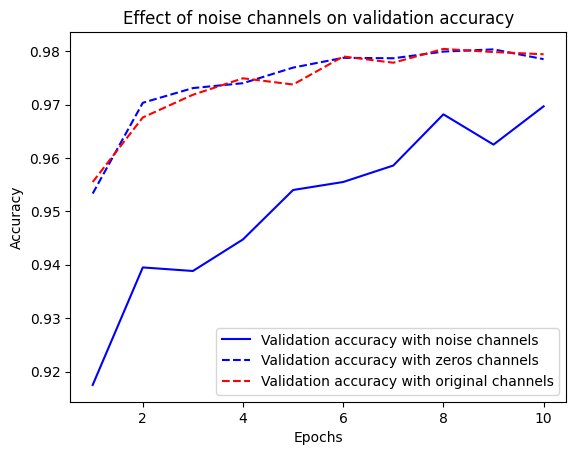

In [33]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original,"r--",
         label="Validation accuracy with original channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3150 - accuracy: 0.1048 - val_loss: 2.3037 - val_accuracy: 0.1120
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2984 - accuracy: 0.1174 - val_loss: 2.3105 - val_accuracy: 0.1032
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2895 - accuracy: 0.1270 - val_loss: 2.3186 - val_accuracy: 0.0967
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2765 - accuracy: 0.1396 - val_loss: 2.3238 - val_accuracy: 0.1024
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2599 - accuracy: 0.1547 - val_loss: 2.3401 - val_accuracy: 0.1024
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2387 - accuracy: 0.1656 - val_loss: 2.3494 - val_accuracy: 0.1045
Epoch 7/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2142 - accuracy: 0.1812 - val_loss: 2.3652 - val_accuracy: 0.1007

In [ ]:
import matplotlib.pyplot as plt
val_acc = history.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [34]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 661.9688 - accuracy: 0.2864 - val_loss: 2.2432 - val_accuracy: 0.1781
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 3.3632 - accuracy: 0.1505 - val_loss: 2.3658 - val_accuracy: 0.1739
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.0104 - accuracy: 0.1670 - val_loss: 2.3138 - val_accuracy: 0.1596
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4223 - accuracy: 0.1519 - val_loss: 2.2420 - val_accuracy: 0.1796
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3896 - accuracy: 0.1685 - val_loss: 2.3580 - val_accuracy: 0.1689
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4915 - accuracy: 0.1704 - val_loss: 2.8793 - val_accuracy: 0.2043
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4696 - accuracy: 0.1569 - val_loss: 2.3780 - val_accuracy: 0.1345
Epoc

In [12]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 0.3862 - accuracy: 0.9076 - val_loss: 0.1896 - val_accuracy: 0.9438
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1284 - accuracy: 0.9639 - val_loss: 0.1460 - val_accuracy: 0.9637
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0993 - accuracy: 0.9743 - val_loss: 0.1322 - val_accuracy: 0.9702
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0799 - accuracy: 0.9794 - val_loss: 0.1310 - val_accuracy: 0.9711
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9832 - val_loss: 0.1584 - val_accuracy: 0.9697
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0564 - accuracy: 0.9855 - val_loss: 0.1740 - val_accuracy: 0.9706
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0537 - accuracy: 0.9882 - val_loss: 0.1914 - val_accuracy: 0.9719
Epoch 

**The same model with a more appropriate learning rate**

In [37]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

history_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3328 - accuracy: 0.9115 - val_loss: 0.1364 - val_accuracy: 0.9620
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1263 - accuracy: 0.9637 - val_loss: 0.1313 - val_accuracy: 0.9668
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0979 - accuracy: 0.9742 - val_loss: 0.1403 - val_accuracy: 0.9687
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0835 - accuracy: 0.9787 - val_loss: 0.2091 - val_accuracy: 0.9608
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0671 - accuracy: 0.9825 - val_loss: 0.1644 - val_accuracy: 0.9688
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0589 - accuracy: 0.9854 - val_loss: 0.2050 - val_accuracy: 0.9713
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0556 - accuracy: 0.9870 - val_loss: 0.1773 - val_accuracy: 0.9745
Epoch 

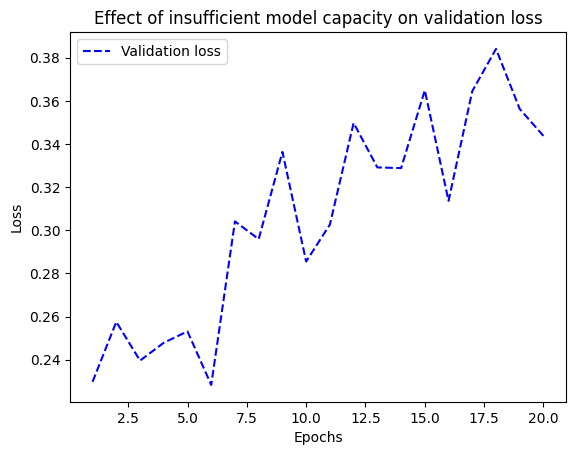

In [38]:
import matplotlib.pyplot as plt
val_loss = history_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [39]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6660 - accuracy: 0.8372 - val_loss: 0.3610 - val_accuracy: 0.9007
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3539 - accuracy: 0.9022 - val_loss: 0.3114 - val_accuracy: 0.9117
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3180 - accuracy: 0.9108 - val_loss: 0.2935 - val_accuracy: 0.9172
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3021 - accuracy: 0.9153 - val_loss: 0.2845 - val_accuracy: 0.9211
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2923 - accuracy: 0.9186 - val_loss: 0.2807 - val_accuracy: 0.9220
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2856 - accuracy: 0.9199 - val_loss: 0.2770 - val_accuracy: 0.9229
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2806 - accuracy: 0.9214 - val_loss: 0.2720 - val_accuracy: 0.9247
Epoch 

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

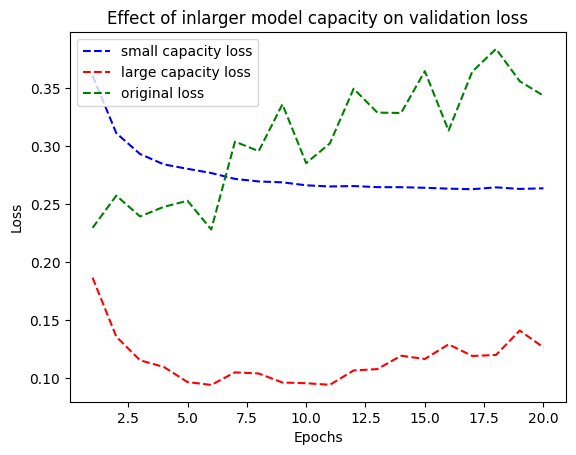

In [44]:
import matplotlib.pyplot as plt
val_small_loss = history_small_model.history["val_loss"]
val_large_loss = history_large_model.history["val_loss"]
val_original_loss = history_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_small_loss, "b--",
         label="small capacity loss")
plt.plot(epochs, val_large_loss, "r--",
         label="large capacity loss")
plt.plot(epochs, val_original_loss, "g--",
         label="original loss")
plt.title("Effect of inlarger model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Version of the model with higher capacity**

In [20]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 58ms/step - loss: 0.5752 - accuracy: 0.7172 - val_loss: 0.3682 - val_accuracy: 0.8457
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3327 - accuracy: 0.8597 - val_loss: 0.4042 - val_accuracy: 0.8275
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2427 - accuracy: 0.9033 - val_loss: 0.3153 - val_accuracy: 0.8704
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1804 - accuracy: 0.9283 - val_loss: 0.2765 - val_accuracy: 0.8878
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1398 - accuracy: 0.9470 - val_loss: 0.3241 - val_accuracy: 0.8807
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1054 - accuracy: 0.9625 - val_loss: 0.4914 - val_accuracy: 0.8441
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0813 - accuracy: 0.9713 - val_loss: 0.3539 - val_accuracy: 0.8869
Epoch 8/20
30

In [ ]:
import matplotlib.pyplot as plt
val_acc_original = history_original.history["val_accuracy"]
val_acc_larger = history_larger.history["val_accuracy"]
val_acc_smaller = history_smaller.history["val_accuracy"]

epochs = range(1, 11)
plt.plot(epochs, val_acc_original, "b-",
         label="Validation accuracy with original")
plt.plot(epochs, val_acc_larger, "r--",
         label="Validation accuracy with larger")
plt.title("Effect of noise channels on validation accuracy")
plt.plot(epochs, val_acc_smaller, "g--",
         label="Validation accuracy with smaller")
plt.title("validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

NameError: ignored

## Summary